In [1]:
import os
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [2]:
cm = pl.get_cmap('viridis')

def update_colors(ax):
    lines = ax.lines
    colors = cm(np.linspace(0, 1, len(lines)))
    for line, c in zip(lines, colors):
        line.set_color(c)

## Quality vs data

In [3]:
f1 = pd.read_csv('metadata/f1_score.csv', index_col=0)
iou = pd.read_csv('metadata/iou_score.csv', index_col=0)
experiments = sorted(f1.T.columns[1:])
f1

,0,1,2,3,4
fraction of data,1.000000,2.000000,4.000000,8.000000,16.000000
$B\mathrm{-1}$,0.825652,0.796277,0.773064,0.704834,0.475728
$B\mathrm{-2}$,0.828316,0.810480,0.769718,0.655784,0.490461
$D\mathrm{-1}$,0.834054,0.828718,0.812496,0.792208,0.735098
$D\mathrm{-2}$,0.837297,0.823871,0.815248,0.777141,0.743895
$C$,0.836019,0.820989,0.790640,0.761645,0.704091
$E$,0.840262,0.757002,0.703875,0.337139,0.457667
$A$,0.819798,0.801795,0.758471,0.642438,0.459902


In [4]:
fractions = [1,2,4,8,16]
labels = ['1', '1/2', '1/4', '1/8', '1/16']
fontsize = 13
space = 0.07
linewidth = 3
ms = 8

results_dir = 'images'
os.makedirs(results_dir, exist_ok=True)

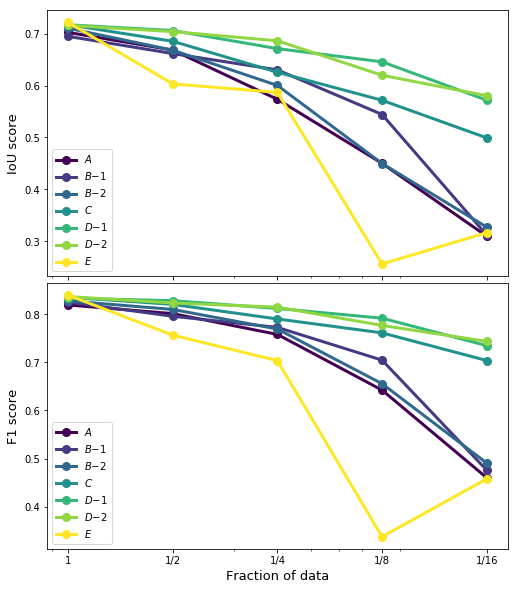

In [5]:
f, axs = plt.subplots(figsize=(7, 8), nrows=2, sharex = True)

for experiment in experiments:
    axs[0].semilogx(fractions, iou.loc[experiment].values, 'o-', linewidth=linewidth, ms=ms, label=experiment)
    
    axs[1].semilogx(fractions, f1.loc[experiment].values, 'o-', linewidth=linewidth, ms=ms, label=experiment)
    
    update_colors(axs[0])
    update_colors(axs[1])

for ax in axs:     
    ax.set_ylabel('Score')
    
    ax.set_xticks(fractions)
    ax.set_xticklabels(labels)
    ax.legend(loc=3)
axs[1].set_xlabel('Fraction of data', fontsize=fontsize)
axs[0].set_ylabel('IoU score', fontsize=fontsize)
axs[1].set_ylabel('F1 score', fontsize=fontsize)

# plt.subplots_adjust(hspace=0.02)
plt.tight_layout(pad=0.0)
plt.savefig(f'{results_dir}/quality_vs_data.png', dpi=300)

## TF Logs

In [6]:
with open('metadata/logs_val.json') as src:
    val_logs = json.loads(src.read())
with open('metadata/logs_train.json') as src:
    train_logs = json.loads(src.read())

In [7]:
fontsize = 13
space = 0.07

def plot_learning_curves(experiment_names, label, train_logs, val_logs, fig_size, loc=5):
    
    f, axs = plt.subplots(figsize = fig_size, ncols=len(experiment_names), nrows=2, sharey = True, sharex = True)
    
    for i, experiment_name in enumerate(experiment_names):
    
        for j, fraction in enumerate(fractions):
            y_train = train_logs[experiment_name][str(fraction)]
            y_val = val_logs[experiment_name][str(fraction)]
            x = range(10)
            axs[0, i].plot(x, y_train, 'o-', linewidth=2, ms=4, label=labels[j])
            axs[1, i].plot(x, y_val, 'o-', linewidth=2, ms=4, label=labels[j])
            
            update_colors(axs[0,i])
            update_colors(axs[1,i])

        axs[0, i].set_title(experiment_name, fontsize=fontsize)
        axs[0, i].legend(loc=loc)
        axs[1, i].set_xlabel('Epochs')
        
    axs[0, 0].set_ylabel(f'Train {label}')
    axs[1, 0].set_ylabel(f'Validation {label}')

    plt.subplots_adjust(wspace = 0.,hspace = 0.)
#     plt.tight_layout(pad=0.0, h_pad=0)
    plt.savefig(f'{results_dir}/learning_curves.png', dpi=300)

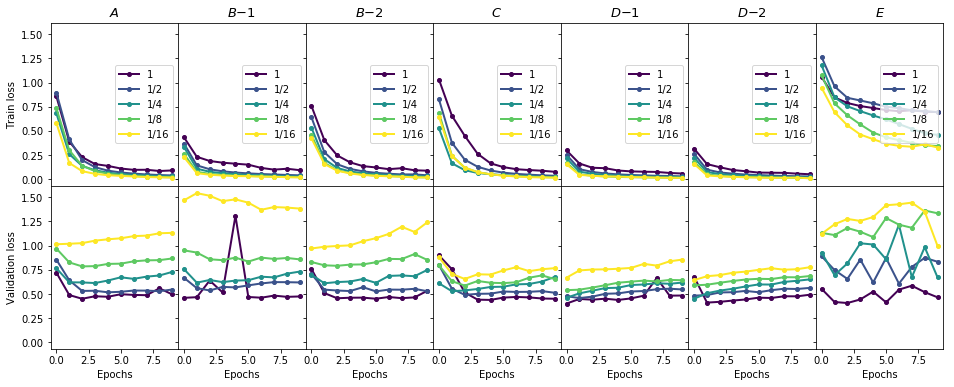

In [8]:
plot_learning_curves(experiments, 'loss', train_logs, val_logs, fig_size=(16,6))